# Linear Models

I want to explore the different linear models with a super simplified data set.

In [8]:
import pandas as pd
from sklearn import linear_model

In [9]:
reg = linear_model.LinearRegression()
reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])
reg.coef_
reg.intercept_

np.float64(1.1102230246251565e-16)

In [10]:
X = [[0, 0], [1, 1], [2, 2]]
y = [0, 1, 2]

In [11]:
pd.DataFrame({'X': X, 'y': y, 'pred': reg.predict(X)})

,X,y,pred
0,"[0, 0]",0,1.110223e-16
1,"[1, 1]",1,1.000000e+00
2,"[2, 2]",2,2.000000e+00


In [12]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import r2_score

In [13]:
np.random.seed(42)

n_samples, n_features = 200, 50
X = np.random.randn(n_samples, n_features)
true_coef = 3 * np.random.randn(n_features)
# Threshold coefficients to render them non-negative
true_coef[true_coef < 0] = 0
y = np.dot(X, true_coef)

# Add some noise
y += 5 * np.random.normal(size=(n_samples,))

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [15]:
from sklearn.linear_model import LinearRegression

reg_nnls = LinearRegression(positive=True)
y_pred_nnls = reg_nnls.fit(X_train, y_train).predict(X_test)
r2_score_nnls = r2_score(y_test, y_pred_nnls)
print("NNLS R2 score", r2_score_nnls)

NNLS R2 score 0.8225220806196526


In [16]:
reg_ols = LinearRegression()
y_pred_ols = reg_ols.fit(X_train, y_train).predict(X_test)
r2_score_ols = r2_score(y_test, y_pred_ols)
print("OLS R2 score", r2_score_ols)

OLS R2 score 0.7436926291700352


Text(0, 0.5, 'NNLS regression coefficients')

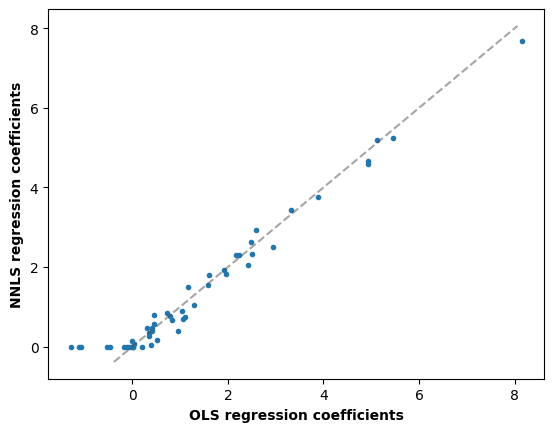

In [17]:
fig, ax = plt.subplots()
ax.plot(reg_ols.coef_, reg_nnls.coef_, linewidth=0, marker=".")

low_x, high_x = ax.get_xlim()
low_y, high_y = ax.get_ylim()
low = max(low_x, low_y)
high = min(high_x, high_y)
ax.plot([low, high], [low, high], ls="--", c=".3", alpha=0.5)
ax.set_xlabel("OLS regression coefficients", fontweight="bold")
ax.set_ylabel("NNLS regression coefficients", fontweight="bold")

## 1) Setup and a tiny dataset

In [24]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

np.random.seed(42)

# Make an easy 2D toy dataset you can visualize
n = 150
x1 = np.linspace(0, 10, n)
# make x2 highly correlated with x1 to introduce multicollinearity later
x2 = x1 + np.random.normal(0, 0.3, size=n)
# a “redundant” third feature that’s basically x1 again
x3 = x1 + np.random.normal(0, 0.2, size=n)

# true relationship (uses only x1 and x2, ignores x3)
# y = 3*x1 - 2*x2 + noise
noise = np.random.normal(0, 1.0, size=n)
y = 3 * x1 - 2 * x2 + noise

X = pd.DataFrame({"x1": x1, "x2": x2, "x3": x3})
y = pd.Series(y, name="y")

In [25]:
X

,x1,x2,x3
0,0.000000,0.149014,0.050099
1,0.067114,0.025635,0.136404
2,0.134228,0.328535,-0.001777
3,0.201342,0.658251,0.247793
4,0.268456,0.198210,0.327071
...,...,...,...
145,9.731544,9.966090,9.592962
146,9.798658,9.427573,9.978578
147,9.865772,9.469635,9.927232
148,9.932886,10.089468,10.095458


In [26]:
y

0      -1.127024
1      -0.410108
2       0.492909
3      -0.102105
4       0.388047
         ...    
145     9.932122
146    10.907426
147     9.718166
148     9.105854
149     8.762596
Name: y, Length: 150, dtype: float64

* We created x1, then x2 is almost the same as x1 with a bit of noise, and x3 is another near-duplicate of x1.
* The true model is y = 3*x1 - 2*x2 + noise. This lets us later see which methods recover something close to (3, -2, 0).

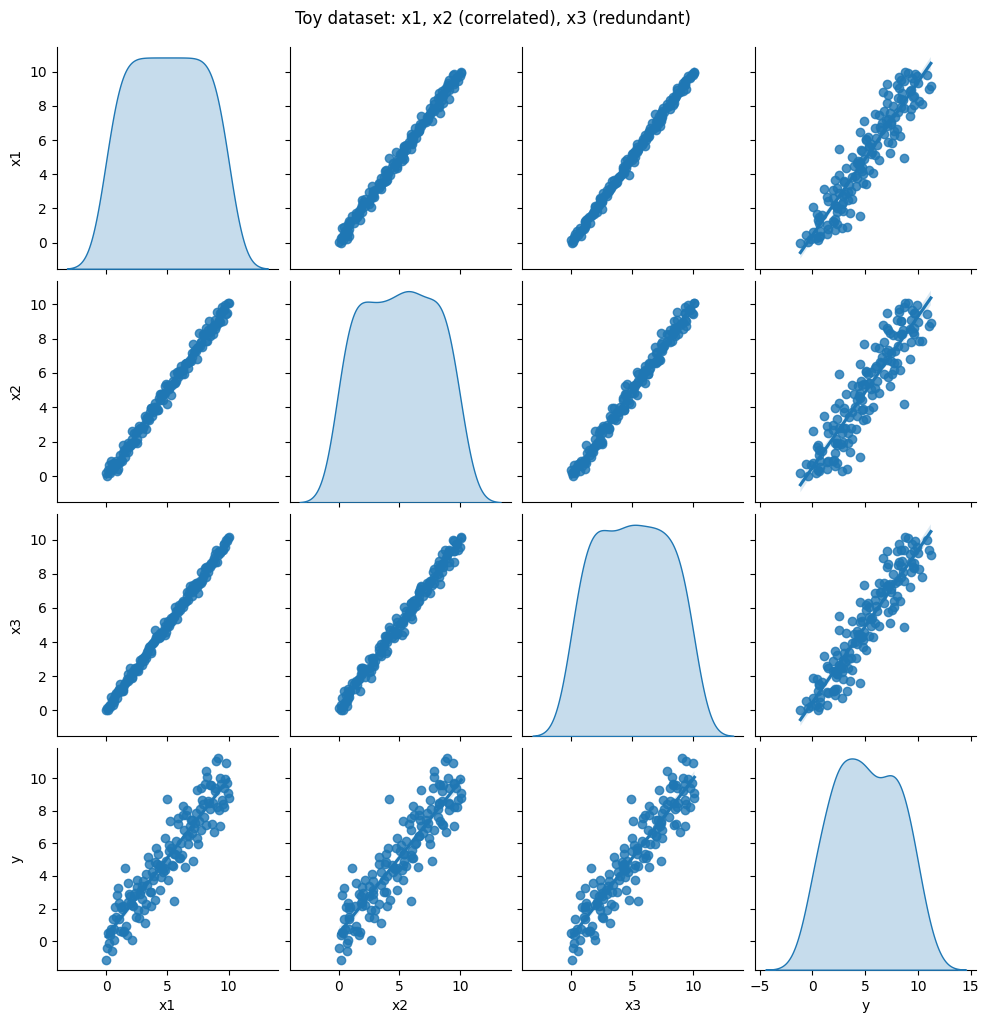

Shapes: (150, 3) (150,)


In [27]:
sns.pairplot(pd.concat([X, y], axis=1), kind="reg", diag_kind="kde")
plt.suptitle("Toy dataset: x1, x2 (correlated), x3 (redundant)", y=1.02)
plt.show()

print("Shapes:", X.shape, y.shape)

* A linear model is y ≈ Xβ + ε where X is an n×p matrix and β is a p×1 vector of coefficients.
* When columns of X are very similar (correlated), it’s hard to separate their individual effects.

In [28]:
from sklearn.linear_model import LinearRegression

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

ols = LinearRegression()
ols.fit(X_train, y_train)

coef_table = pd.DataFrame({
    "feature": X.columns,
    "coef_": ols.coef_
}).assign(intercept=ols.intercept_)
coef_table

,feature,coef_,intercept
0,x1,2.870441,0.135925
1,x2,-2.060525,0.135925
2,x3,0.168591,0.135925


In [29]:
y_pred_val = ols.predict(X_val)
print("OLS:")
print("  MSE:", mean_squared_error(y_val, y_pred_val))
print("  MAE:", mean_absolute_error(y_val, y_pred_val))
print("  R^2:", r2_score(y_val, y_pred_val))

OLS:
  MSE: 0.7716515673992599
  MAE: 0.6670827116981441
  R^2: 0.9206118417054625



OLS chooses β to minimize the average squared error. With correlated features, OLS can produce unstable or unintuitive coefficients while still predicting reasonably.

4) Residual plots (quick diagnostic)

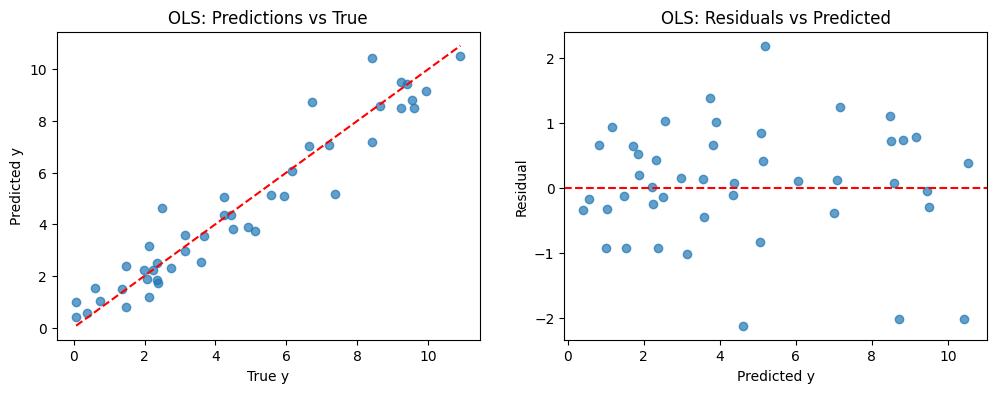

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].scatter(y_val, y_pred_val, alpha=0.7)
ax[0].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
ax[0].set_xlabel("True y")
ax[0].set_ylabel("Predicted y")
ax[0].set_title("OLS: Predictions vs True")

resid = y_val - y_pred_val
ax[1].scatter(y_pred_val, resid, alpha=0.7)
ax[1].axhline(0, color='r', linestyle='--')
ax[1].set_xlabel("Predicted y")
ax[1].set_ylabel("Residual")
ax[1].set_title("OLS: Residuals vs Predicted")
plt.show()